# Phys 581 Winter 2019
# Assignment #2: Geomagnetic Bottle
## Alexander Hickey, 10169582

In [3]:
#Import useful libraries
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [11]:
T = 1.60218e-16 #1 keV in J
m = 1.6726219e-27 #Proton mass in kg
B0 = 3.1130e-5 #Magnetic flux density of earth
RE = 6371e3 #Radius of earth in m
e_m = 95788332.07911484 #Charge to mass ratio of a proton
Lat = 66 #Latitude in degrees
e = 1.60217662e-19
v0 = np.sqrt(2.0*T*m)/(B0*e*RE) #Initial speed

In [5]:
def B(x,y,z):
    
    scale = 1/(x*x+y*y+z*z)**(5/2)
    
    Bx = 3.0*x*z
    By = 3.0*y*z
    Bz = 2.0*z*z-x*x-y*y
    
    return np.array([Bx,By,Bz])*scale

def sphere_to_cart(rtp):
    
    xyz = np.zeros(rtp.shape)
    
    xyz[0] = rtp[0]*np.sin(rtp[1])*np.cos(rtp[2])
    xyz[1] = rtp[0]*np.sin(rtp[1])*np.sin(rtp[2])
    xyz[2] = rtp[0]*np.cos(rtp[1])
    
    return xyz

def time_evol(t,state):
    '''
    state = [vx,vy,vx,x,y,z]
    '''
    newstate = np.zeros(state.shape)
    
    x,y,z = state[3:]
    
    newstate[:3] = np.cross(state[:3],B(x,y,z))
    newstate[3:] = state[:3]
    
    
    return newstate

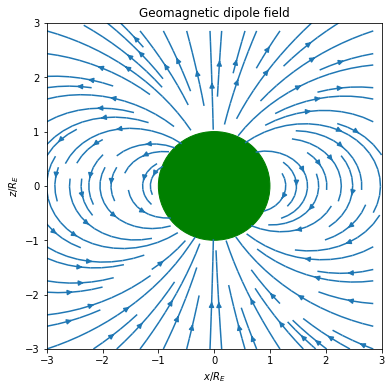

In [7]:
w = 3.0
x, y, z = np.linspace(-w,w,100),0 , np.linspace(-w,w,100)
xx,zz = np.meshgrid(x,z)
Bx, By, Bz = B(xx,y,zz)
mask = xx**2+zz**2 > 1

fig, ax = plt.subplots(figsize = (6,6))
ax.streamplot(x, z, Bx*mask, Bz*mask)
circ = plt.Circle((0, 0), radius=1, edgecolor='green', facecolor='green')
ax.add_patch(circ)
ax.set_xlabel('$x/R_E$')
ax.set_ylabel('$z/R_E$')
ax.set_title('Geomagnetic dipole field')
plt.show()

In [30]:
#Initialize:
state0 = np.zeros(6)
r,theta,phi = 1.0,(90-Lat)*np.pi/180,0.0
x0,y0,z0 = sphere_to_cart(np.array([r,theta,phi]))
B0vec = B(x0,y0,z0)
v0vec = v0*B0vec/np.linalg.norm(B0vec)
state0[:3] = v0vec
state0[3:] = [x0, y0, z0]

t_span = (0,17454)
#t_eval = np.linspace(0,100)
dat = scipy.integrate.solve_ivp(time_evol,t_span,state0)

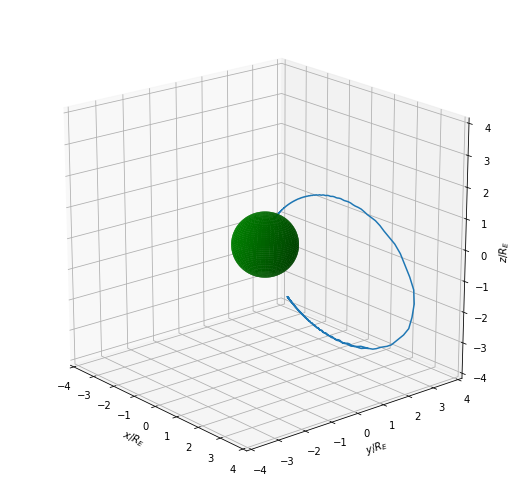

In [32]:
time = dat.t
[x,y,z] = dat.y[3:]

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(9,9))
ax = fig.gca(projection='3d')
#ax = plt.axes(projection='3d')
ax.plot3D(x,y,z)

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(-4, 4)
ax.set_xlabel('$x/R_E$')
ax.set_ylabel('$y/R_E$')
ax.set_zlabel('$z/R_E$')
ax.view_init(20,-40)


u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
xc = 1. * np.outer(np.cos(u), np.sin(v))
yc = 1. * np.outer(np.sin(u), np.sin(v))
zc = 1. * np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the surface
ax.plot_surface(xc, yc, zc, color='g')

plt.show()